NAME: Youssef MILED

# **<center>INF TC1 - Quantification d'image**</center>

---

## **Introduction :**

Ce devoir vise à automatiser la détermination d'une palette de couleurs optimale pour une image donnée, en respectant la contrainte de réduction de la taille de la palette par rapport au nombre initial de couleurs tout en maintenant la représentativité des couleurs d'origine. 
Dans le contexte de la codification d'images avec 8 bits par composante RGB, cette quantification de couleurs, une tâche fréquente dans les éditeurs d'images, implique une perte de couleurs. L'objectif est consiste alors à réaliser cette réduction avec les paramètres appropriés, fournissant ainsi une palette permettant de recolorer efficacement l'image en sortie.

Nous explorerons plusieurs les méthodes permettant de réaliser ce projet.

## **Résolution :**

Tout d'abord, on commence par tester le chargement et l'affichage d'une image.

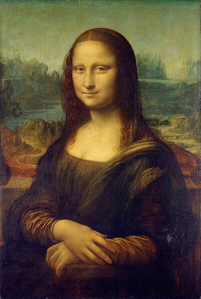

In [1]:
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

mona_im = Image.open("figures/MonaLisa.jpeg")
mona_im = mona_im.convert("RGB")

W, H = mona_im.size
W, H = W//2, H//2
mona_im = mona_im.resize((W, H))

display(mona_im)

## **I. Calcul des fréquences des couleurs :** 

On définit une fonction qui renvoie les couleurs et les fréquences associées d'une image

In [2]:
def get_colors_and_frequencies(image):
    px = image.load()
    
    colors = []
    colors_dict = {}
    width = image.width
    height = image.height
    
    for x in range(width):
        for y in range(height):
            c = px[x, y]
            if c in colors_dict:
                colors.append(c)
                colors_dict[c] += 1
            else:
                colors_dict[c] = 1
    
    return colors, colors_dict
            

In [3]:
mona_colors, tunis_colors_dico = get_colors_and_frequencies(mona_im)

## **II. Choix d'une palette de couleurs :**

On utilise d'abord une méthode naïve pour choisir k couleurs représentatives dans une image : on trie les couleurs dans l'ordre décroissant et on prend les k premières couleurs. C'est donc celles qui sont les plus présentes dans l'image.

In [4]:
def choose_color_palette_naive(colors_dico, k):   
    
    n = len(colors_dico)

    sorted_colors = sorted(colors_dico.keys(), key=lambda x: colors_dico[x], reverse=True)
    if k <= n:
        palette = sorted_colors[:k]
    else:
        palette = sorted_colors

    return palette

In [5]:
mona_colors, mona_colors_dico = get_colors_and_frequencies(mona_im)
print(f"Il y a {len(mona_colors)} couleurs dans l'image MonaLisa.jpeg")

Il y a 17095 couleurs dans l'image MonaLisa.jpeg


On affiche ici la plette de couleurs retenues, c'est-à-dire les k couleurs les plus représentatives :

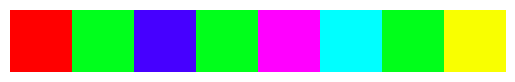

In [6]:
k = 8
rainbow_im = Image.open("figures/rainbow.png")
rainbow_im = rainbow_im.convert("RGB")
rainbow_colors, rainbow_colors_dico = get_colors_and_frequencies(rainbow_im)

rainbow_palette = choose_color_palette_naive(rainbow_colors_dico, k)


# On ffiche la palette de couleurs
plt.imshow([rainbow_palette])
plt.axis('off')
plt.show()


On teste ensuite avec l'image qui contient une palette de 8 couleurs, et on vérifie que la quantification nous donne bien les 8 couleurs si on chosisit k = 8.

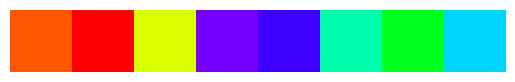

In [7]:
k = 8
rainbow_8_im = Image.open("figures/rainbow-palette-8.png")
rainbow_8_im = rainbow_8_im.convert("RGB")
_, rainbow_8_colors_dico = get_colors_and_frequencies(rainbow_8_im)

rainbow_8_palette = choose_color_palette_naive(rainbow_8_colors_dico, k)


# On ffiche la palette de couleurs
plt.imshow([rainbow_8_palette])
plt.axis('off')
plt.show()


<div>
    <table>
      <tr>
        <td>
          <img src="figures/rainbow-palette-8.png" style="height:6cm width:3cm;">
        </td>
      </tr>
    </table>
    <p>Image "rainbow-palette-8.png"</p>
  </div>

On obtient les même couleurs, c'est cohérent.

Complexité : En notant n la taille de l'ensemble colors, la complexité de cette fonction est de $O(n \log n)$ puisque la complexité tri est de l'ordre de $O(n \log n)$. Mais pour utiliser choose_color_palette_naive il faut avoir le dictionnaire colors_dico avec get_colors_and_frequencies, dont la complexité est de $O(wh)$ avec w et h les dimensions de l'image. La complexité de choose_color_palette serait donc de $O(wh \ log (wh))$

## **III. Recoloriage à partir de la palette représentative :**

On implémente ensuite la distance euclidienne pour déterminer la distance entre deux couleurs :

In [8]:
from math import sqrt

def euclidian_distance(c1, c2):
    # c1 et c2 sont des tuples
    r1, g1, b1 = c1
    r2, g2, b2 = c2
    return sqrt((r1 - r2)**2 + (g2 - g1)**2 + (b2 - b1)**2)

Test de la fonction euclidian_distance :

In [9]:
assert(euclidian_distance((42, 42, 42), (42, 42, 42)) == 0)
assert(euclidian_distance((0, 0, 0), (2, 2, 2)) == sqrt(12))

On définit une fonction qui détermine la couleur la plus proche d'une couleur donnée dans une liste

In [10]:
def mini(palette, element, distance):
    mini = distance(palette[0], element)
    res = palette[0]
    for color in palette:
        d = distance(color, element)
        if d < mini:
            mini = d
            res = color

    return res

On recolorie l'image avec les k couleurs chosisies :

In [11]:
def recoloriate(w, h, px, px2, palette):
    # px : pixels de l'image d'oirgine
    # px2 : pixels de la nouvelle image
    for x in range(w):
        for y in range (h):
            color = mini(palette, px[x, y], euclidian_distance)
            px2[x, y] = color


On teste la recoloriation :

In [12]:
def test_recoloration_mona_ks():
    # on génère les résultats de quantification et pour plusieurs k
    for k in [10, 50, 90, 150, 200, 300]:
        mona_palette = choose_color_palette_naive(mona_colors_dico, k)
        px_mona = mona_im.load()
        recolored_mona_image = Image.new("RGB", (W, H))
        px2 = recolored_mona_image.load()
        recoloriate(W, H, px_mona, px2, mona_palette)
        recolored_mona_image.save(f"figures/rec_naive_mona k={k}.png")

Les images suivantes sont obtenues en exécutant : 


In [13]:
# test_recoloration_mona_ks()

Il faut ici un grand nombre de couleurs représentatives pour pouvoir voir une ressemblance entre l'image recoloriée et l'image origianale. La figure ci-dessus le montre.

<div style="text-align:center;">
    <table>
      <tr>
        <td>
          <img src="figures/rec_naive_mona k=10.png" style="height:6cm width:4cm;">
          <p>k = 10</p>
        </td>
        <td>
          <img src="figures/rec_naive_mona k=10.png" style="height:6cm width:4cm;">
          <p>k = 50</p>
        </td>
        <td>
          <img src="figures/rec_naive_mona k=90.png" style="height:6cm width:4cm;">
          <p>k = 90</p>
        </td>
        <td>
          <img src="figures/rec_naive_mona k=150.png" style="height:6cm width:4cm;">
          <p>k = 150</p>
        </td>
        <td>
          <img src="figures/rec_naive_mona k=200.png" style="height:6cm width:4cm;">
          <p>k = 200</p>
        </td>
        <td>
          <img src="figures/rec_naive_mona k=300.png" style="height:6cm width:4cm;">
          <p>k = 300</p>
        </td>
      </tr>
    </table>
    <p>Résultats pour la reconstruction de l'image avec différents k</p>
  </div>

On commence donc à voir les limitations de la méthode naïve. Mais il faut d'abord pouvoir quantifier un "rapprochement" entre les images.

## **IV. Calcul d'un score de rapprochement entre deux images :**

On définit d'abord une fonction qui calcule la moyenne d'une liste de flottants pour calculer le score d'un recoloriage.

In [14]:
def mean(liste):
    n = len(liste)
    s = 0
    for e in liste:
        s += e
    
    return s/n

In [15]:
# On calcule un score entre l'image originale et l'image transformée

def score(original_image, recolored_image, distance=euclidian_distance):
    # le score est la moyenne des distances (par défaut euclidienne) entre les pixels 2 par 2
    original_pixels = original_image.load()
    recolored_pixels = recolored_image.load()
    w, h = original_image.size
    
    errors = []
    
    for x in range(w):
        for y in range(h):
            d = distance(original_pixels[x, y], recolored_pixels[x, y])
            errors.append(abs(d))
    
    error = mean(errors)

    return error

In [16]:
rainbow_im = Image.open("figures/rainbow.png")
rainbow_im = rainbow_im.convert("RGB")
px_rainbow = rainbow_im.load()
w, h = rainbow_im.size

rainbow_colors, rainbow_colors_dico = get_colors_and_frequencies(rainbow_im)
rainbow_palette = choose_color_palette_naive(rainbow_colors_dico, k=8)

recolored_rainbow_image = Image.new("RGB", (w, h))
px_rec_rainbow = recolored_rainbow_image.load()
recoloriate(w, h, px_rainbow, px_rec_rainbow, rainbow_palette)


recolored_rainbow_prof_im = Image.open("figures/rainbow-recoloriee.png")
recolored_rainbow_prof_im = recolored_rainbow_prof_im.convert("RGB")

score1 = score(rainbow_im, recolored_rainbow_image)
score2 = score(rainbow_im, recolored_rainbow_prof_im)
print(f"score recoloriage naïf         : {score1} \nscore recoloriage déjà proposé : {score2}")
assert(score1 < score2)
# Le coloriage avec la méthode naïve que j'ai utilisé est ici plus proche de l'image originale que le recoloriage 
# proposé par le porfesseur dans le fichier figures l'est


score recoloriage naïf         : 44.37207973662724 
score recoloriage déjà proposé : 91.94694620263368


Toutefois, cela reste insatisfaisant, étant donnée les résultats obtenus pour MonaLisa.

## **V. Amélioration du choix de la palette :**

On crée une fonction de test pour éviter de dupliquer du code :

In [17]:
def test(image, k, fonction_palette, recoloriate_func=recoloriate, show_images=True, show_palette=False):
    recolored_im = Image.new("RGB", image.size)
    px = image.load()
    w, h = image.size

    px_recolored = recolored_im.load()
    colors, colors_dico = get_colors_and_frequencies(image)
    palettte = fonction_palette(colors_dico, k)

    recoloriate(w, h, px, px_recolored, palettte)
    if show_images :
        display(image)
    
    if show_palette:
        plt.imshow([palettte])
        plt.axis('off')
        plt.show()
    
    if show_images:
        display(recolored_im)
        
    return recolored_im
    

On améliore le choix de la palette de couleurs. On choisit la couleur au milieu de chaque intervalle afin d'assurer une distribution équilibrée des couleurs dans la palette.

In [18]:
def choose_color_palette_improved(colors, k):
    sorted_colors = sorted(colors)
    # On divise la liste des couleurs en intervalles égaux :
    interval_size = len(sorted_colors) // k
    # On sélectionne le milieu de l'intervalle puisque i*intervale_size indique le début de l'intervalle
    palette = [sorted_colors[i * interval_size + interval_size // 2] for i in range(k)]

    return palette

In [19]:
# cette cellule s'exécute en 35s environ
k = 20
boticelli_im = Image.open("figures/boticelli.jpg")
boticelli_im = boticelli_im.convert("RGB")
w, h = boticelli_im.size
w, h = w//2, h//2
boticelli_im = boticelli_im.resize((w, h))

recolored_boticelli_improved_image = test(boticelli_im, k, choose_color_palette_improved, show_images=False)
recolored_boticelli_improved_image.save("figures/boticelli_improved k=20.png")

recolored_boticelli_image = test(boticelli_im, k, choose_color_palette_naive, show_images=False)
recolored_boticelli_image.save("figures/boticelli_naive k=20.png")

<div style="text-align:center;">
    <table>
      <tr>
        <td>
          <img src="figures/boticelli.jpg" style="height:6cm width:3cm;">
          <p>image originale</p>
        </td>
        <td>
          <img src="figures/boticelli_naive k=20.png" style="height:6cm width:3cm;">
          <p>méthode naïve k = 20</p>
        </td>
        <td>
          <img src="figures/boticelli_improved k=20.png" style="height:6cm width:3cm;">
          <p>méthode améliorée k = 20</p>
        </td>
      </tr>
    </table>
    <p>Comparaison méthode naïve et méthode améliorée</p>
  </div>

On observe déjà une très grande différence par rapport à la méthode naïve. Dès k = 20, l'image est nettement mieux, la méthode naïve donne une image très éloigné de l'image originale.

In [20]:
score_naive = score(boticelli_im, recolored_boticelli_image)
score_improved = score(boticelli_im, recolored_boticelli_improved_image)
print(f"score méthode naïve = {score_naive}  score méthode du milieu = {score_improved}")
assert(score_improved < score_naive)


score méthode naïve = 65.88095709756746  score méthode du milieu = 25.02713596808915


On peut encore améliorer le rendu final par des méthodes de filtrage :

## **VI. Pré-traitement des images par un filtre :**

On va lisser les couleurs en prétraitant les images par un filtre gaussien.

In [21]:
from PIL import Image, ImageFile, ImageDraw, ImageChops, ImageFilter

def preprocess(image):
    image_gaussien = image.filter(ImageFilter.GaussianBlur)
    return image_gaussien

def process_and_recoloriate(image, k, recoloriate=recoloriate):
    W, H = image.size
    image_gaussien = preprocess(image)

    px_image = image_gaussien.load()
    image_gaussien_colors, image_gaussien_colors_dico = get_colors_and_frequencies(image_gaussien)
     
    recolored = Image.new("RGB", image.size)
    px_recolored = recolored.load()
    palette = choose_color_palette_improved(image_gaussien_colors_dico, k)
    
    recoloriate(W, H, px_image, px_recolored, palette)
    return recolored
    

In [22]:
# cette cellule s'exécute en moins de 2min
mona_image = Image.open("figures/MonaLisa.jpeg")
mona_image = mona_image.convert("RGB")

k = 100
recolored_mona_gaussien_image = process_and_recoloriate(mona_image, k)
recolored_mona_image = test(mona_image, k, choose_color_palette_naive, show_images=False)

recolored_mona_image.save("figures/recolored_mona.png")
recolored_mona_gaussien_image.save("figures/recolored_mona_gaussien.png")

On observe alors :
<div style="text-align;">
    <table>
      <tr>
        <td>
          <img src="figures/recolored_mona.png" style="height:6cm width:4cm;">
          <p>Sans filtre préalable k = 100</p>
        </td>
        <td>
          <img src="figures/recolored_mona_gaussien.png" style="height:6cm width:4cm;">
          <p>Avec filtre gaussien k = 100</p>
        </td>
      </tr>
    </table>
    <p>Influence du prétraitement dans le rendu final</p>
  </div>

On observe une différence : l'image recoloriée après avoir effectué un filtre gaussien est plus proche de l'image originale, ce que l'on peut quantifier par le score :

In [23]:
score_sans_gaussien = score(mona_image, recolored_mona_image)
score_gaussien = score(mona_image, recolored_mona_gaussien_image)
print(f"score_gaussine = {score_gaussien}, score_sans_gaussien = {score_sans_gaussien}")
# score_gaussien = 15.05 < score_sans_gaussien = 82.53

score_gaussine = 15.054366882616844, score_sans_gaussien = 82.53218421188244


## **VII. Optimisations :**

On peut encore optimiser certaines parties de ce projet afin de réduire la compléxité temporelle mais aussi pour avoir un rendu plus proche de l'image originale mais en se rapportant cette fois à l'oeil humain et à sa sensibilite.

### **1. k-d tree** :

On propose d'abord une structure de donnée pour optimiser le calcul de la couleur la plus proche. Pour cela, on utilise un arbre pour organiser les couleurs d'une palette une fois pour toute au début. On divise récursivement l'espace des couleurs (espace 3D) en sous-espaces, en choisissant alternativement une dimension à chaque niveau de l'arbre.

Cette structure d'arbre est un k-d tree (ou arbre d-dimensionnel) avec k = 1 (le nombre de voisins les plus proches à trouver) et d = 3 (le nombre de dimension des données).

**ATTENTION** ! Il ne faut pas confondre ce k avec le k = longueur de la palette. Dans toute la suite, lorsqu'on parle de k (en dehors de l'apellation k-d tree), on parle de la longueur de la palette

Cela permet une recherche efficace en limitant le nombre de comparaisons nécessaires. Nous préciserons la complexité plus loin.

In [24]:
class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right

def kd_tree(points, depth=0):
    # Si la liste de points est vide, on retourne None pour indiquer la fin de la construction de l'arbre
    if len(points) == 0:
        return None

    k = len(points[0])  # Dimensionnalité des points (supposée constante)
    
    # Axe de séparation actuel (r, g ou b)
    axe = depth % k

    # On trie les points en fonction de la valeur sur l'axe de séparation actuel
    points.sort(key=lambda x: x[axe])
    median = len(points) // 2
    
    # On crée un nœud avec la médiane des points comme valeur, et on construit récursivement les sous-arbres gauche et droit
    return Node(
        point=points[median],
        left=kd_tree(points[:median], depth + 1),       # Sous-arbre gauche avec les points avant la médiane
        right=kd_tree(points[median + 1:], depth + 1)   # Sous-arbre droit avec les points après la médiane
    )

def closest_point(root, target, distance=euclidian_distance, depth=0, best=None):
    # Si le nœud racine est None, on retourne le point le plus proche actuellement connu
    if root is None:
        return best

    k = len(target) # Dimensionnalité de la cible
    axe = depth % k
    next_best = None
    next_branch = None
    
    # On met à jour le point le plus proche si le point du nœud racine est plus proche de la cible
    if best is None or distance(root.point, target) < distance(best, target):
        next_best = root.point
    else:
        next_best = best

    # On détermine le prochain sous-arbre à explorer en fonction de la valeur sur l'axe de séparation
    if target[axe] < root.point[axe]:
        next_branch = root.left
    else:
        next_branch = root.right
        
    # On effectue une recherche récursive dans le prochain sous-arbre
    return closest_point(next_branch, target, distance, depth + 1, next_best)

On définit alors une nouvelle méthode de recoloration, qui a une complexité temporelle inférieure à celles qu'on a utilisé jusque-là.

In [25]:
def recoloriate_better(w, h, px, px2, palette, distance=euclidian_distance):    
    # On construit un k-d tree à partir de la palette
    palette_kd_tree = kd_tree(palette)    
    for x in range(w):
        for y in range(h):
            closest_color = closest_point(palette_kd_tree, px[x, y], distance)
            px2[x, y] = closest_color

Bilan :
La complexité de construction de notre arbre dépend du choix de la médiane à chaque niveau de construction mais en moyenne elle est de $O(k \ logk)$ avec k le nombre de couleurs dans la palette

La complexité de la fonction recoloriate qu'on a implémenté au début est de $O(w \ h \ k)$ avec w et h les dimensions de l'image. En effet on effectue deux boucles imbriquées de tailles respectives w et h, et à l'intérieur de ces boucles l'appel à la fonction mini va parcourir toute la palette qui est de taille k.

Ici, la construction de l'arbre de la palette se fait une fois pour toute au début (après la construction de la palette) et se fait en $O(k \ log(k))$ et la recherche dans l'arbre a une complexité de $O(log(k))$. Ainsi, la compexité totale de recoloriate_better est de $O(w \ h \ (log(k) + log(k))) = O(w \ h \ log(k))$. Ceci est moins couteux que la première méthode et permet d'augmenter le nombre k de couleurs dans la palette et en observant une différence logarithmique sur le temps.

Nous illustrons la différence avec certains tests sur le temps pris avec ces deux méthodes :

In [26]:
import time

def comparaison_recoloriate_functions():
    image = Image.open("figures/MonaLisa.jpeg")
    image = image.convert("RGB")
    
    px_original = image.load()

    list_k = [k for k in range(1, 320, 40)]

    colors, colors_dico = get_colors_and_frequencies(image)
    
    w, h = image.size

    rec_images = [Image.new("RGB", (w, h)) for i in range(len(list_k))]
    px_rec = [rec_im.load() for rec_im in rec_images]
    palettes = [choose_color_palette_improved(colors, k) for i in range(len(list_k))]

    times_recoloriate_better = []
    for i in range(len(list_k)):
        start_time = time.time()
        recoloriate_better(w, h, px_original, px_rec[i], palettes[i])
        end_time = time.time()
        times_recoloriate_better.append(end_time- start_time)
        

    times_recoloriate = []
    for i in range(len(list_k)):
        start_time = time.time()
        recoloriate(w, h, px_original, px_rec[i], palettes[i])
        end_time = time.time()
        times_recoloriate.append(end_time - start_time)

    plt.plot(list_k, times_recoloriate, label='recoloriate')
    plt.plot(list_k, times_recoloriate_better, label='recoloriate_better')
    plt.xlabel("k")
    plt.ylabel("Temps d'\exécution")
    plt.legend()
    plt.show()


In [27]:
# comparaison_recoloriate_functions()
# l'exécution prend du temps, c'est pourquoi je mets directement le résultat 
# ci-dessous

On observe donc une amélioration nette en terme de complexité temporelle lorsqu'on utilise recoloriate_better.
<div style="text-align:center;">
<table>
  <tr>
    <td>
      <img src="figures/analyse_recoloriate.png" style="width: 5cm height:5cm;">
      <p>Analyse complexité temporelle recoloriate et recoloriate_better</p>
    </td>
  </tr>
</table>
</div>

Tests :

In [28]:
# cette cellule s'exécute en 3min 5s
paths = ["figures/tunis.jpg", "figures/paris.jpg", "figures/pekin.jpg", "figures/boticelli.jpg", "figures/bob_leponge.jpg"]
images = [Image.open(path) for path in paths]
pixels = []
sizes = []
colors_list, colors_dico_list = [], []
name = ["tunis", "paris", "pekin", "boticelli", "bob l'eponge"]

ks = [5, 50, 100, 150, 200]
rec_images = []
for i in range(len(images)):
    im = images[i]
    im = im.convert("RGB")
    w, h = im.size
    w, h = w//2, h//2
    im = im.resize((w, h))
    images[i] = im
    sizes.append((w, h))
    px_original = im.load()
    pixels.append(px_original)
    colors, colors_dico = get_colors_and_frequencies(im)
    colors_list.append(colors)
    colors_dico_list.append(colors_dico)
    
    for k in ks:
        palette = choose_color_palette_improved(colors_dico, k)
        
        rec_im = Image.new("RGB", (w, h))
        px_rec = rec_im.load()
        recoloriate_better(w, h, px_original, px_rec, palette)
        rec_images.append(rec_im)
        
        rec_im.save(f"figures/{name[i]} k ={k}.png")
    

<div style="text-align:center;">
    <table>
      <tr>
        <td>
          <img src="figures/tunis k =5.png" style="height:6cm width:4cm;">
          <p>tunis k = 5</p>
        </td>
        <td>
          <img src="figures/tunis k =50.png" style="height:6cm width:4cm;">
          <p>tunis k = 50</p>
        </td>
        <td>
          <img src="figures/tunis k =150.png" style="height:6cm width:4cm;">
          <p>tunis k = 150</p>
        </td>
        <td>
          <img src="figures/tunis k =200.png" style="height:6cm width:4cm;">
          <p>tunis k = 200</p>
        </td>
      </tr>
    </table>
    <p>Résultats pour la reconstruction de l'image avec différents k</p>
  </div>

<div style="text-align:center;">
    <table>
      <tr>
        <td>
          <img src="figures/bob l'eponge k =5.png" style="height:6cm width:4cm;">
          <p>tunis k = 10</p>
        </td>
        <td>
          <img src="figures/bob l'eponge k =50.png" style="height:6cm width:4cm;">
          <p>tunis k = 50</p>
        </td>
        <td>
          <img src="figures/bob l'eponge k =150.png" style="height:6cm width:4cm;">
          <p>tunis k = 150</p>
        </td>
        <td>
          <img src="figures/bob l'eponge k =200.png" style="height:6cm width:4cm;">
          <p>tunis k = 200</p>
        </td>
      </tr>
    </table>
    <p>Résultats pour la reconstruction de l'image avec différents k</p>
  </div>

In [29]:
colors, colors_dico = get_colors_and_frequencies(images[0]) # image[0] correspond à tunis.png l'image originale
print(len(colors_dico))

113594


In [30]:
print(score(images[0], rec_images[4]))  # rec_images[4] correspond à tunis recoloriée avec k = 200

11.642002855790087


On observe qu'on a une image très proche de l'originale (score = 11.6 environ) avec beaucoup moins de couleurs puisque dans la nouvelle image on a <= 200 couleurs alors que dans l'origianale on a 239094 couleurs. 
Si on n'avait pas la fonction recoloriate_better avec l'abre d-dimenssionnel, le calcul serait beacoup trop pour arriver à ce résultat. On peut donc se permettre d'aller jusque k un peu grand sans avoir à attendre beaucoup.

Ainsi, à partir de maintenant nous allons utiliser recoloriate_better pour les tests.

### **2. Utilisation de Kmeans** :

Afin d'améliorer le choix de la palette, on va appliquer l'algorithme des kmeans. L'idée est de construire k couleurs (qui ne sont pas forcément dans l'image) de telle sorte à regrouper les pixels de l'image dans k clusters. Chaque pixel appartiendra au cluster le plus proche.

L'algorithme des kmeans ne donne pas toujours le même résultat puisqu'on choisit initialement des centres de clusters de manière aléatoire et qu'on n'a pas l'assurance d'une convergence vers une solution optimale. On va donc procéder à plusieurs essais et prendre les clusters minimisant la différence avec l'image originale.

In [34]:
import random

def k_moyennes(colors_dico, k, distance=euclidian_distance, max_iterations=50):
    """
    Args:
        colors_dico (list): les couleurs que l'on va diviser en k classes
        k (int): nombre de classes à distinguer
        max_iterations (int, optional): Le nombre maximum d'itération après lequel on s'arrête. Defaults to 100.

    Returns:
        list: liste de k clusters qui regroupe les pixels de l'image.
    """
    colors = list(colors_dico.keys())
    # On initialise les centres de clusters de manière aléatoire
    centroides = random.sample(colors, k)
    
    for _ in range(max_iterations):
        # On affecte chaque couleur au cluster le plus proche
        affectations = [min(range(k), key=lambda i: distance(color, centroides[i])) for color in colors]
        
        # On met ensuite à jour les centres des clusters en utilisant la moyenne des couleurs attribuées
        new_centroides = []
        for i in range(k):
            cluster_points = [colors[j] for j, affectation in enumerate(affectations) if affectation == i]
            if cluster_points:
                # c'est la formule dans kmeans :
                centroid = tuple(map(int, [sum(x) / len(cluster_points) for x in zip(*cluster_points)]))
                new_centroides.append(centroid)
            else:
                new_centroides.append(centroides[i])  # On conserve l'ancien centroïde si le cluster est vide
        
        if new_centroides == centroides:
            break  # On s'arrête si les centroïdes n'ont pas changé, l'algorithme a convergé
        
        centroides = new_centroides

    return centroides

On observe que le score de la recoloration avec k_moyennes n'est pas constant ce qui est cohérent puisque l'affectation à des centroides au début de l'algorithme se fait de manière aléatoire. Mais globalement on observe avec plusieurs tests que k_moyennes donne une coloration plus proche et plus satisfaisante que l'amélioration qu'on a proposé juste avant :

In [35]:
# cette cellule s'éxécute en 1-2min
k = 20
umbrella_im = Image.open("figures/umbrellas.png")
umbrella_im = umbrella_im.convert("RGB")
w, h = umbrella_im.size
umbrella_im = umbrella_im.resize((w, h))


recolored_umbrellas_image = test(umbrella_im, k, k_moyennes, recoloriate_func=recoloriate_better, show_images=False)
score_umbrella_kmeans = score(umbrella_im, recolored_umbrellas_image)

recolored_umbrellas_image.save("figures/rec_umbrellas_kmeans k=20.png")    

In [36]:
rec_umbrellas_milieu = test(umbrella_im, k, choose_color_palette_improved, show_images=False)
rec_umbrellas_milieu.save("figures/rec_umbrellas_milieu k=20.png")
score_sans_kmeans = score(umbrella_im, rec_umbrellas_milieu)

print(f"score kmeans : {score_umbrella_kmeans}")
print(f"score snas kmeans : {score_sans_kmeans}")
assert(score_umbrella_kmeans < score_sans_kmeans)

score kmeans : 26.065159884110567
score snas kmeans : 35.397917341677484


<div>
    <table>
      <tr>
        <td>
          <img src="figures/rec_umbrellas_milieu k=20.png" style="height:7cm width:7cm;">
          <p>Méthode du milieu</p>
        </td>
        <td>
          <img src="figures/rec_umbrellas_kmeans k=20.png" style="height:7cm width:7cm;">
          <p>Méthode kmeans</p>
        </td>
    </table>
    <p>Comparaison méthodes du milieu et kmeans</p>
  </div>

Kmeans donne des résultats mieux que ceux de la méthode du milieu !

Cependant, pour des images plus grandes, kmeans prend du temps à s'exécuter puisque la convergence de l'algorithme n'est pas assurée (on peut faire max_iteration=50 fois dans closest_point le pire cas). Analysons alors la complexité temporelle à travers une simulation :

(cette partie du code prend du temps à s'exécuter, j'ai mis juste après les résultats qu'on a obtenu)

In [37]:
import time
def analyse_kmeans(kmean_function=k_moyennes):
    kmeans_times = []
    milieu_times = []
    ks = [5, 10, 15, 20, 25, 30, 35, 40]
    
    for k in ks:
        start_time = time.time()
        test(umbrella_im, k, k_moyennes, recoloriate_func=recoloriate_better, show_images=False)
        end_time = time.time()
        
        kmeans_times.append(end_time-start_time)
        
        start_time = time.time()    
        test(umbrella_im, k, choose_color_palette_improved, recoloriate_func=recoloriate_better, show_images=False)
        end_time = time.time()
        milieu_times.append(end_time-start_time)
            
    plt.plot(ks, kmeans_times, label='K_moyennes')
    plt.plot(ks, milieu_times, label='méthode du milieu')

    plt.xlabel('k')
    plt.ylabel("temps d'\execution")
    plt.legend()
    plt.show()

On obtient les résultats suivants :

In [38]:
#analyse_kmeans()

<div style="text-align:center;">
    <table>
      <tr>
        <td>
          <img src="figures/complexite kmeans.png" style="height:6cm width:4cm;">
          <p>temps d'exécution kmeans</p>
        </td>
    </table>
  </div>

Ainsi, kmeans donne de meilleurs résultats mais semble prendre plus de temps que l'algorithme du milieu pour s'éxécuter.

De plus, on peut remarquer que la fonction qui implémente la méthode du milieu de l'intervalle pour choisir une palette de couleurs donne des résultats bons mais moins satisfaisants que ceux renvoyés par la fonction python quantize() :

In [39]:
# Analyse des performances de quantize en comparaison avec nos méthodes.
boticelli_im_quantize = boticelli_im.quantize(20)
boticelli_im_quantize = boticelli_im_quantize.convert("RGB")
score_quantize = score(boticelli_im, boticelli_im_quantize)
print(f"score méthode quantize  = {score_quantize}\nscore méthode du milieu = {score_improved}")
assert(score_quantize < score_improved)

score méthode quantize  = 18.90753092270921
score méthode du milieu = 25.02713596808915


Dans la suite, je vais utiliser le module KMeans de Python puisque la fonction k_moyennes que j'ai implémenté prend du temps et que le KMeans est plus optimisé.

In [51]:
# On utilise numpy afin d'avoir des opérations optimisées en temps de calcul
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans

def quantize_image(image_path, k):
    image = Image.open(image_path)
    
    # On convertit l'image en tableau numpy pour optimiser les opérations
    image_tableau = np.array(image)

    h, w, _ = image_tableau.shape
    image_tableau = image_tableau.reshape(h * w, -1)
    
    # On utilise KMeans pour trouver les centroides (k couleurs représentatives)
    kmeans = KMeans(n_clusters=k, max_iter=10, random_state=42)
    kmeans.fit(image_tableau)
    palette = kmeans.cluster_centers_
    
    # On remplace les couleurs dans l'image quantifiée
    labels = kmeans.predict(image_tableau)
    image_tableau_quantifiee = palette[labels].reshape(h, w, -1)
    
    # On crée une nouvelle image quantifiée
    image_tableau_quantifiee = Image.fromarray(image_tableau_quantifiee.astype(np.uint8))
    
    return image_tableau_quantifiee

In [52]:
# cette cellule s'exécute en 30s environ
k = 20
boticelli_python_quantize = boticelli_im.quantize(k)
boticelli_python_quantize.save("figures/boticelli_python_quantize k=20.png")
boticelli_my_quantize = quantize_image("figures/boticelli.jpg", k)
boticelli_my_quantize = boticelli_my_quantize.resize((boticelli_my_quantize.width//2, boticelli_my_quantize.height//2))
boticelli_my_quantize.save("figures/boticelli_my_quantize k=20.png")

/home/youssef/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<div>
    <table>
      <tr>
        <td>
          <img src="figures/boticelli_python_quantize k=20.png" style="height:4cm width:5cm;">
          <p>Python quantize(20)</p>
        </td>
        <td>
          <img src="figures/boticelli_my_quantize k=20.png" style="height:4cm width:5cm;">
          <p>Ma fonction quantize_image k = 20</p>
        </td>
    </table>
    <p>Comparaison des quantize</p>
  </div>

In [53]:
my_score = score(boticelli_im, boticelli_my_quantize)
print(f"score avec quantize_image : {my_score}\nscore avec quantize() de Python : {score_quantize}")
assert(my_score < score_quantize)

score avec quantize_image : 13.266723959802432
score avec quantize() de Python : 18.90753092270921


## **VIII. Changement d'espace colorimétrique :**

On souhaite prendre en compte la sensibilité variable de l'oeil humain. On utilise pour cela un espace colorimétrique (CIELAB99) pour lequel deux paires de couleurs équidistantes apparaissent aussi équidistantes à l'oeil humain

Les axes de CIELAB99 ont (L, a, b). On peut passer de l'espace RGB à l'espace CIELAB99 en passant par plusieurs autres espaces. Il faut passer par RGB, ensuite par XYZ, puis par CIELAB pour arriver à la fin à CIELAB99.

<div>
    <table>
      <tr>
      <td>
          <img src="figures/rgb2xyz.png" style="height:5cm width:4cm;">
          <p>RGB -> XYZ</p>
      </td>
        <td>
          <img src="figures/xyz2cielab.png" style="height:5cm width:4cm;">
          <p>XYZ -> CIELAB</p>
        </td>
     </table>
  </div>

La distance entre deux couleurs est alors mesurée par $$\Delta E = \sqrt{{(L_1 - L_2)^2 + (a_1 - a_2)^2 + (b_1 - b_2)^2}}$$


$\Delta E $ est compris entre 0 et 100

Nous implémentons ces calculs ci-dessous :

In [54]:
from math import log
import numpy as np

def rgb2xyz(c):
    r, g, b = c
    matrice_rgb = np.array([r, g, b])
    M = 5.6508 * np.array([[0.49, 0.31, 0.2], [0.17697, 0.81240, 0.010630], [0, 0.01, 0.99]])
    matrice_xyz = M.dot(matrice_rgb)
    
    # on a effectué 18 multiplications, et 6 additions
    return (matrice_xyz[0], matrice_xyz[1], matrice_xyz[2])
    
    
def xyz2lab(cx):
    cln = (95.0489, 100, 108.8840)
    f = []
    for i in range(3):
        t = cx[i] / cln[i]
        if t > 216/24389:
            f.append(t**(1/3))
        else:
            f.append(t * 841 / 108 + 4/29)
    # dans la boulce on effectue 3 * (3 multiplications (dont division) et 1 addtion et une puissance) 
    # = 9 multiplications et 3 additions et 3 fonction puissance au total 
    
    L = 116 * f[1] - 16
    a = 500 * (f[0] - f[1])
    b = 200 * (f[1] - f[2])
    
    # on a effectué au total 12 multiplications et 6 additions et 3 fonction puissance au total 
    return (L, a, b)

def lab2lab99(cl):
    L99 = 105.51 * log(1 + 0.0158 * cl[0])
    e = cl[1] * 0.96126 + cl[2] * 0.27563
    f = 0.7 * (cl[1] * -0.27563 + cl[2] * 0.96126)

    G = (e**2 + f**2)**0.5
    if G == 0:
        return (L99, 0, 0)


    k = log(1 + 0.045 * G) / 0.045

    a99 = k * e / G
    b99 = k * f / G
    
    # on a effectué 15 multiplications (dont divisions), 5 additions et on a utilisé 2 fois la fonctions log
    return (L99, a99, b99)

def cielab(cl99_1, cl99_2):
    (L1, a1, b1) = cl99_1
    (L2, a2, b2) = cl99_2
    
    # 3 multiplications, 6 additions (dont soustraction) et une fonction sqrt
    return ((L2 - L1)**2 + (a2 - a1)**2 + (b2 - b1)**2)**0.5

def cielab99_distance(c1, c2):
    c_xyz1 = rgb2xyz(c1)
    c_xyz2 = rgb2xyz(c2)
    clab1 = xyz2lab(c_xyz1)
    clab2 = xyz2lab(c_xyz2)
    clab99_1 = lab2lab99(clab1)
    clab99_2 = lab2lab99(clab2)
    
    # on a effectué au total 2*(48 multiplications, 23 additions, 2 log et 4 fonction puissance)
    # donc on a un total de 136 opérations arithmétiques et 12 fonctions mathématiques
    return cielab(clab99_1, clab99_2)

Cette transformation rend la différence entre les couleurs plus fines, comme on peut l'observer sur l'exemple ci-dessous :

In [55]:
# Fonction qui crée une image d'un rectangle coloriée avec moitié de couleur c1 et moitié de couleur c2
def creer_rectangle_moit_moit(c1, c2, width, height):
    image = Image.new('RGB', (width, height))
    px = image.load()

    # Coordonnées y pour diviser l'image en deux moitiés
    half_height = height // 2

    # Remplir la moitié supérieure avec la couleur c1
    for y in range(half_height):
        for x in range(width):
            px[x, y]  = c1

    # On remplit la moitié inférieure avec la couleur c2
    for y in range(half_height, height):
        for x in range(width):
            px[x, y]  = c2

    return image


In [56]:
magenta = (220, 0, 70)
violet = (210, 0, 170)
magenta_violet_im = creer_rectangle_moit_moit(magenta, violet, 200, 200)
magenta_violet_im.save("figures/magenta_violet.png")

orange = (250, 100, 0)
vert = (180, 172, 4)
orange_vert_im = creer_rectangle_moit_moit(orange, vert, 200, 200)
orange_vert_im.save("figures/orange_vert.png")

euc_violet_magenta = euclidian_distance(violet, magenta)
euc_orange_vert = euclidian_distance(orange, vert)

print(f"euclidian(magenta, violet) : {euc_violet_magenta}")
print(f"cielab99_distance(orange, vert) : {cielab99_distance(violet, magenta)}")
print(f"euclidian(magenta, violet) : {euc_orange_vert}")
print(f"cielab99_distance(orange, vert) : {cielab99_distance(orange, vert)}")
assert(euc_violet_magenta == euc_orange_vert )


euclidian(magenta, violet) : 100.4987562112089
cielab99_distance(orange, vert) : 13.296342142666656
euclidian(magenta, violet) : 100.4987562112089
cielab99_distance(orange, vert) : 30.71910200857447


<div>
    <table>
      <tr>
      <td>
          <img src="figures/magenta_violet.png" style="height:5cm width:4cm;">
      </td>
        <td>
          <img src="figures/orange_vert.png" style="height:5cm width:4cm;">
        </td>
     </table>
     <p>Paires de couleurs ayant le même écart avec RGB et qui différent avec CIELAB99</p>
  </div>

La distance CIELAB99 montre que la paire de couleurs orange/vert est plus contrasté que la paire de couleurs magenta/violet. Cette information n'est pas présente dans la distance euclidienne avec RGB, puisqu'on a obtenu la même distance.

In [57]:
def choose_palette_cielab99(colors, num_colors):
    palette = k_moyennes(colors_dico, k, distance=cielab99_distance, max_iterations=30)
    return palette

In [ ]:
# cette cellule s'éxécute en 23min environs les résultas sont données ci-dessous
tunis_image = Image.open("figures/tunis.jpg")
tunis_image = tunis_image.convert("RGB")
px_tunis = tunis_image.load()
    
k = 10
w, h = tunis_image.size
_, tunis_colors_cielab_dico = get_colors_and_frequencies(tunis_image)

palettte_cielab = choose_palette_cielab99(colors_dico, k)
palette_normale = choose_color_palette_improved(colors_dico, k)

recolored_tunis_image = quantize_image("figures/tunis.jpg", k)
recolored_tunis_cielab99_image = Image.new("RGB", tunis_image.size)

recoloriate_better(w, h, px_tunis, recolored_tunis_cielab99_image.load(), palettte_cielab)
recoloriate_better(w, h, px_tunis, recolored_tunis_image.load(), palette_normale)

recolored_tunis_image.save("figures/recolored_tunis.png")
recolored_tunis_cielab99_image.save("figures/recolored_tunis_cielab99.png")

/home/youssef/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<div style="text-align:center;">
    <table>
      <tr>
        <td>
          <img src="figures/tunis.jpg" style="height:6cm width:3cm;">
          <p>image originale</p>
        </td>
        <td>
          <img src="figures/recolored_tunis.png" style="height:6cm width:3cm;">
          <p>Recoloration avec RGB</p>
        </td>
        <td>
          <img src="figures/recolored_tunis_cielab99.png" style="height:6cm width:3cm;">
          <p>Recoloration avec CIELAB99</p>
        </td>
      </tr>
    </table>
    <p>Comparaison des résultats avec les deux espaces colorimétriques RGB et CIELAB99</p>
  </div>

In [ ]:
# cette cellule s'exécute en 1min 30s environ
score_better = score(tunis_image, recolored_tunis_cielab99_image, distance=cielab99_distance)
score_rgb = score(tunis_image, recolored_tunis_image, distance=cielab99_distance)

print(f"score avec CIELAB99 : {score_better}\nscore avec rgb : {score_rgb}")
assert(score_better < score_rgb)
# 11.614 < 13.3297

score avec CIELAB99 : 11.61381933032431
score avec rgb : 13.297143173585095


On obtient donc une image plus proche de l'originale en utilisant ce nouvel espace de couleurs.

Le problème majeure avec cet espace colorimétrique, c'est qu'il nécessite beaucoup d'opérations, contrairement au domaine RGB.

En effet, avec l'espace RGB pour calculer la distance entre deux images (distance euclidienne) on faisait 9 opérations. 

Or, dans ce que nous avons implémenté, on a du passer de l'espace RGB à l'espace CIELAB99, et on a dû effectué 136 opérations arithmétiques (et utiliser des focntions complexes tels que log) pour chaque paire de couleur.

## **Pour aller plus loin :**

Nous allons maintenant créer une palette représentative à partir de plusieurs images. En effet, en faisant ainsi on a accès à une plus grande variété de couleurs. Chaque image peut contenir des couleurs uniques ou des variations de couleurs qui ne sont pas présentes dans les autres images. En combinant les couleurs de différentes sources, vous pouvez créer une palette plus riche et diversifiée.

De plus, on peut choisir une fois pour toute une palette de couleurs à patrtir de plusieurs images, et on n'aura plus besoin de recalculer une palette pour chaque image puisque la palette obtenue contiendra des couleurs pour représenter toutes les images.

In [90]:
def create_palette_generale(image_paths, k):
    all_colors = {} # on fait un dictionnaire car c'est ce que k_moyenne attend en argument
    for image_path in image_paths:
        image = Image.open(image_path)
        image = image.convert("RGB")
        colors, _ = get_colors_and_frequencies(image)
        for color in colors:
            if color not in all_colors:
                all_colors[color] = 1
    
    tableau_couleur = np.array(list(all_colors.keys()))

    # On utilise KMeans pour trouver les centroides (k couleurs représentatives)
    kmeans = KMeans(n_clusters=k, max_iter=10, random_state=42)
    kmeans.fit(tableau_couleur)
    palette = kmeans.cluster_centers_.tolist()
    palette = [(int(element[0]), int(element[1]), int(element[2])) for element in palette]

    return palette

On calcule la palette générale une fois pour toute : (je donne directement le résultat après donc pas besoin d'éxécuter la cellule)

In [102]:
# cette cellule s'éxécute en 7min 30s environ (le résultat est donnée juste après)
#palette_generale = create_palette_generale(image_paths=["figures/ben_ten.png", "figures/bob_leponge.jpg", "figures/MonaLisa.jpeg", "figures/boticelli.jpg", "figures/color-rainbow.png", "figures/paris.jpg", "figures/pekin.jpg"], k=500)

/home/youssef/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [106]:
palette_generale = [(159, 23, 10), (143, 170, 155), (47, 39, 54), (132, 103, 35), (240, 191, 105), (8, 115, 186), (186, 203, 229), (69, 89, 83), (134, 128, 104), (192, 166, 108), (83, 160, 232), (202, 180, 169), (138, 172, 52), (23, 23, 5), (78, 144, 22), (202, 152, 36), (244, 243, 62), (251, 243, 203), (91, 54, 6), (8, 59, 100), (97, 119, 138), (14, 141, 243), (131, 192, 212), (17, 105, 5), (37, 139, 50), (179, 97, 90), (180, 215, 46), (204, 169, 132), (105, 83, 63), (251, 210, 146), (214, 39, 27), (162, 140, 97), (87, 173, 176), (155, 110, 5), (33, 81, 126), (248, 247, 245), (178, 123, 58), (141, 46, 38), (234, 237, 32), (163, 195, 193), (66, 128, 190), (8, 38, 58), (81, 74, 44), (209, 165, 79), (95, 155, 83), (219, 206, 184), (117, 135, 144), (246, 186, 27), (80, 105, 70), (153, 99, 93), (246, 170, 157), (204, 131, 239), (214, 235, 97), (204, 232, 241), (5, 7, 20), (68, 42, 45), (147, 209, 62), (114, 102, 93), (57, 112, 5), (72, 93, 115), (146, 190, 241), (33, 98, 150), (140, 80, 2), (5, 109, 48), (83, 138, 128), (42, 67, 23), (175, 144, 137), (218, 81, 57), (50, 22, 20), (235, 227, 218), (125, 164, 22), (62, 111, 35), (129, 16, 6), (22, 115, 218), (187, 178, 134), (146, 136, 117), (116, 195, 248), (249, 217, 94), (111, 190, 59), (198, 202, 212), (38, 67, 74), (51, 159, 236), (110, 146, 160), (147, 104, 67), (171, 111, 41), (247, 207, 124), (215, 163, 148), (71, 155, 73), (84, 71, 79), (8, 80, 138), (195, 139, 83), (116, 87, 21), (205, 236, 34), (137, 96, 222), (167, 187, 215), (51, 126, 206), (146, 182, 174), (24, 175, 243), (226, 147, 79), (143, 134, 55), (66, 120, 126), (101, 61, 38), (21, 126, 51), (239, 133, 112), (236, 190, 69), (65, 31, 9), (91, 129, 102), (194, 76, 55), (5, 35, 8), (220, 196, 151), (250, 219, 187), (182, 139, 99), (126, 162, 186), (129, 65, 64), (129, 148, 156), (153, 139, 78), (95, 180, 55), (164, 167, 172), (142, 198, 40), (183, 182, 179), (76, 180, 249), (122, 147, 125), (151, 112, 113), (7, 48, 78), (29, 40, 36), (64, 71, 55), (175, 211, 81), (66, 52, 20), (4, 255, 45), (123, 110, 71), (108, 29, 12), (169, 215, 223), (245, 245, 8), (250, 221, 161), (252, 230, 112), (247, 165, 17), (98, 71, 6), (190, 141, 21), (111, 133, 111), (140, 30, 21), (160, 38, 28), (204, 214, 225), (191, 216, 114), (223, 172, 124), (23, 101, 162), (47, 81, 89), (89, 27, 21), (228, 222, 200), (154, 149, 136), (193, 112, 100), (29, 44, 53), (154, 162, 99), (208, 159, 57), (50, 119, 176), (100, 107, 65), (31, 29, 19), (145, 194, 197), (12, 72, 6), (92, 94, 96), (106, 166, 229), (249, 148, 130), (201, 0, 254), (155, 150, 13), (61, 52, 61), (13, 82, 189), (149, 108, 27), (119, 165, 155), (222, 241, 75), (69, 125, 52), (73, 138, 143), (157, 207, 96), (95, 91, 78), (171, 56, 36), (121, 67, 5), (12, 5, 4), (162, 118, 76), (6, 96, 162), (173, 130, 83), (6, 13, 36), (236, 197, 158), (108, 175, 174), (239, 234, 235), (207, 177, 113), (30, 92, 6), (218, 69, 5), (243, 118, 33), (182, 133, 40), (203, 201, 22), (181, 201, 189), (163, 160, 150), (160, 128, 126), (118, 114, 106), (132, 158, 140), (48, 55, 45), (110, 154, 141), (248, 246, 25), (56, 48, 33), (5, 60, 114), (30, 126, 243), (140, 179, 222), (104, 64, 67), (223, 116, 94), (93, 90, 53), (34, 112, 179), (199, 145, 136), (91, 153, 221), (190, 160, 125), (189, 40, 29), (127, 130, 77), (82, 54, 53), (117, 84, 91), (201, 23, 14), (119, 72, 30), (66, 158, 47), (201, 182, 150), (198, 57, 41), (73, 143, 105), (120, 187, 38), (247, 179, 45), (180, 204, 101), (78, 108, 90), (34, 129, 72), (101, 142, 28), (25, 69, 111), (91, 72, 57), (6, 95, 33), (212, 118, 53), (101, 78, 41), (76, 143, 217), (55, 13, 2), (176, 149, 118), (192, 232, 56), (139, 174, 201), (172, 123, 6), (91, 143, 163), (137, 98, 10), (249, 191, 143), (0, 253, 198), (171, 86, 74), (249, 226, 207), (61, 130, 11), (109, 166, 193), (193, 213, 245), (41, 124, 191), (78, 159, 159), (153, 76, 67), (95, 52, 23), (230, 233, 187), (87, 2, 254), (5, 17, 6), (62, 74, 72), (226, 189, 92), (46, 142, 223), (137, 207, 249), (132, 127, 123), (50, 75, 7), (153, 183, 208), (72, 88, 99), (156, 188, 63), (36, 19, 31), (249, 206, 171), (153, 187, 226), (168, 171, 116), (90, 174, 244), (103, 139, 130), (5, 77, 24), (131, 93, 64), (150, 92, 30), (32, 55, 6), (116, 36, 31), (177, 167, 153), (121, 149, 172), (166, 213, 62), (151, 103, 47), (230, 176, 84), (218, 215, 212), (143, 148, 99), (126, 55, 47), (185, 177, 163), (222, 242, 49), (158, 232, 92), (176, 185, 197), (140, 159, 170), (124, 176, 235), (77, 121, 138), (252, 226, 132), (57, 83, 32), (218, 59, 39), (249, 244, 224), (231, 212, 171), (248, 158, 98), (226, 236, 249), (170, 205, 245), (81, 84, 69), (125, 162, 98), (211, 222, 246), (75, 56, 6), (58, 43, 4), (160, 205, 209), (246, 206, 108), (145, 167, 184), (125, 53, 25), (16, 24, 26), (105, 131, 155), (34, 110, 45), (138, 83, 83), (191, 145, 52), (152, 123, 93), (11, 90, 150), (89, 115, 40), (131, 198, 56), (180, 198, 212), (99, 113, 99), (236, 212, 191), (103, 122, 230), (105, 187, 192), (108, 54, 4), (195, 192, 194), (89, 127, 10), (225, 185, 111), (247, 199, 42), (198, 152, 70), (68, 61, 40), (225, 239, 110), (103, 12, 4), (112, 93, 39), (44, 28, 5), (175, 126, 26), (113, 124, 88), (22, 110, 175), (22, 130, 230), (131, 100, 81), (49, 97, 142), (83, 135, 66), (168, 137, 60), (144, 119, 74), (4, 32, 72), (92, 124, 119), (38, 114, 6), (160, 116, 58), (55, 94, 103), (97, 147, 115), (34, 126, 32), (23, 56, 93), (127, 172, 169), (182, 232, 250), (221, 174, 66), (88, 133, 148), (193, 148, 111), (66, 151, 229), (237, 241, 206), (101, 106, 114), (160, 178, 162), (193, 163, 147), (230, 180, 142), (53, 144, 38), (15, 128, 247), (91, 120, 82), (179, 149, 79), (78, 61, 67), (253, 239, 177), (223, 178, 160), (40, 57, 62), (216, 225, 173), (249, 145, 21), (117, 76, 49), (150, 62, 49), (196, 91, 71), (126, 200, 76), (38, 128, 215), (231, 194, 128), (134, 96, 101), (48, 31, 40), (187, 222, 230), (55, 134, 92), (77, 15, 4), (163, 79, 219), (200, 156, 93), (155, 95, 7), (133, 112, 54), (130, 139, 90), (248, 244, 42), (80, 108, 109), (66, 90, 10), (101, 170, 29), (166, 194, 83), (216, 171, 95), (204, 196, 162), (60, 107, 117), (102, 52, 54), (178, 24, 13), (68, 93, 56), (193, 223, 87), (210, 207, 198), (222, 236, 23), (79, 43, 25), (143, 165, 125), (130, 153, 70), (34, 11, 4), (116, 120, 126), (202, 195, 181), (133, 114, 90), (174, 161, 135), (251, 61, 67), (213, 185, 136), (46, 40, 23), (181, 129, 120), (245, 197, 87), (216, 100, 79), (191, 212, 203), (187, 135, 67), (19, 159, 244), (200, 200, 46), (106, 66, 20), (248, 161, 143), (6, 105, 174), (96, 80, 26), (82, 106, 127), (8, 71, 126), (166, 189, 177), (114, 94, 73), (120, 84, 4), (219, 195, 170), (102, 155, 179), (149, 152, 154), (34, 109, 200), (103, 106, 82), (99, 162, 159), (159, 122, 40), (235, 207, 144), (101, 74, 83), (91, 151, 142), (222, 222, 229), (235, 195, 176), (138, 138, 137), (110, 126, 70), (68, 166, 243), (165, 129, 106), (23, 122, 193), (21, 44, 74), (81, 169, 49), (97, 187, 250), (3, 44, 94), (135, 114, 108), (148, 204, 222), (171, 71, 54), (168, 109, 108), (82, 38, 3), (210, 159, 114), (5, 53, 13), (121, 180, 202), (43, 108, 162), (160, 147, 118), (117, 156, 43), (131, 85, 33), (167, 196, 230), (250, 148, 67), (158, 177, 190), (117, 97, 54), (47, 124, 53), (4, 22, 53), (207, 239, 47), (207, 241, 66), (132, 182, 185), (51, 64, 76), (206, 126, 118), (249, 213, 71), (11, 98, 208), (60, 75, 93), (66, 31, 29), (145, 181, 34), (176, 156, 100), (60, 138, 213), (254, 239, 149), (248, 240, 89), (7, 32, 36), (82, 64, 26), (27, 25, 44), (19, 110, 35), (218, 170, 44), (159, 205, 43), (136, 88, 48), (59, 134, 69), (163, 113, 21), (138, 49, 11), (250, 176, 123), (24, 10, 22), (76, 98, 28), (204, 225, 129), (89, 45, 40), (53, 101, 239), (119, 75, 75), (139, 213, 83), (132, 81, 17), (184, 217, 64), (123, 166, 214), (70, 120, 166), (106, 128, 48), (26, 88, 140), (54, 150, 60)]

In [107]:
def choose_palette_from_images(colors, k):
    return palette

def quantize_image_from_many_images(image, k):
    w, h = image.size
    rec_im = Image.new("RGB", (w, h))
    recoloriate_better(w, h, image.load(), rec_im.load(), palette)
    return rec_im


In [108]:
tsinghua_im = Image.open("figures/tsinghua.jpg")
tsinghua_im = tsinghua_im.convert("RGB")

k = 100
recolored_tsinghua_im = quantize_image_from_many_images(tsinghua_im, k)
recolored_tsinghua_im = recolored_tsinghua_im.convert("RGB")
recolored_tsinghua_im.save(f"figures/recolored_tsinghua_from_images k={k}.png")

<div style="text-align:center;">
    <table>
      <tr>
        <td>
          <img src="figures/tsinghua.jpg" style="height:4cm width:3cm;">
          <p>image originale</p>
        </td>
        <td>
          <img src="figures/recolored_tsinghua_from_images k=200.png" style="height:6cm width:3cm;">
          <p>Image obtenue</p>
        </td>
      </tr>
    </table>
    <p>Coloration à partir de la palette générale</p>
  </div>

Bilan : On a calculé une palette de couleurs qui nous a servis a recolorier d'autres images avec moins de couleurs, ce qui sert à ne pas faire trop de calculs et mémoriser des couleurs.

Cepedant, il faudrait beacoup plus de choix d'image pour s'assurer de pouvoir représenter la majorité des couleurs dans les clusters, puisque palette_generale ne permet pas d'avoir une recoloration satisfaisante pour toutes les images comme le montre l'exemple ci-dessous. Dans un projet plus grand, on pourra donc faire ceci.

In [116]:
colors_im = Image.open("figures/image_colors.png")
colors_im = colors_im.convert("RGB")

k = 100
recolored_colors_im = quantize_image_from_many_images(colors_im, k)
recolored_colors_im = recolored_colors_im.convert("RGB")
recolored_colors_im.save(f"figures/recolored_colors_from_images k={k}.png")

<div style="text-align:center;">
    <table>
      <tr>
        <td>
          <img src="figures/image_colors.png" style="height:4cm width:3cm;">
          <p>image originale</p>
        </td>
        <td>
          <img src="figures/recolored_colors_from_images k=100.png" style="height:4cm width:3cm;">
          <p>Image obtenue</p>
        </td>
      </tr>
    </table>
    <p>Coloration à partir de la palette générale</p>
  </div>

## **Conclusion :**

Lors de ce projet, nous avons pu tester plusieurs fonctions de quatification d'image qui nous ont permis de réduire drastiquement le nombre de couleurs tout en ayant une image finale proche de l'originale. Le changement de l'espace de couleurs a aussi permis d'affiner cette quantification, même si les calculs nécessaires sont complexes et couteux en temps.